In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 데이터 불러오기
df = pd.read_csv('real_final_data.csv', encoding='utf-8-sig')
df = df[df['itemLocation'].isin(['US', 'CN'])]

# ✅ 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

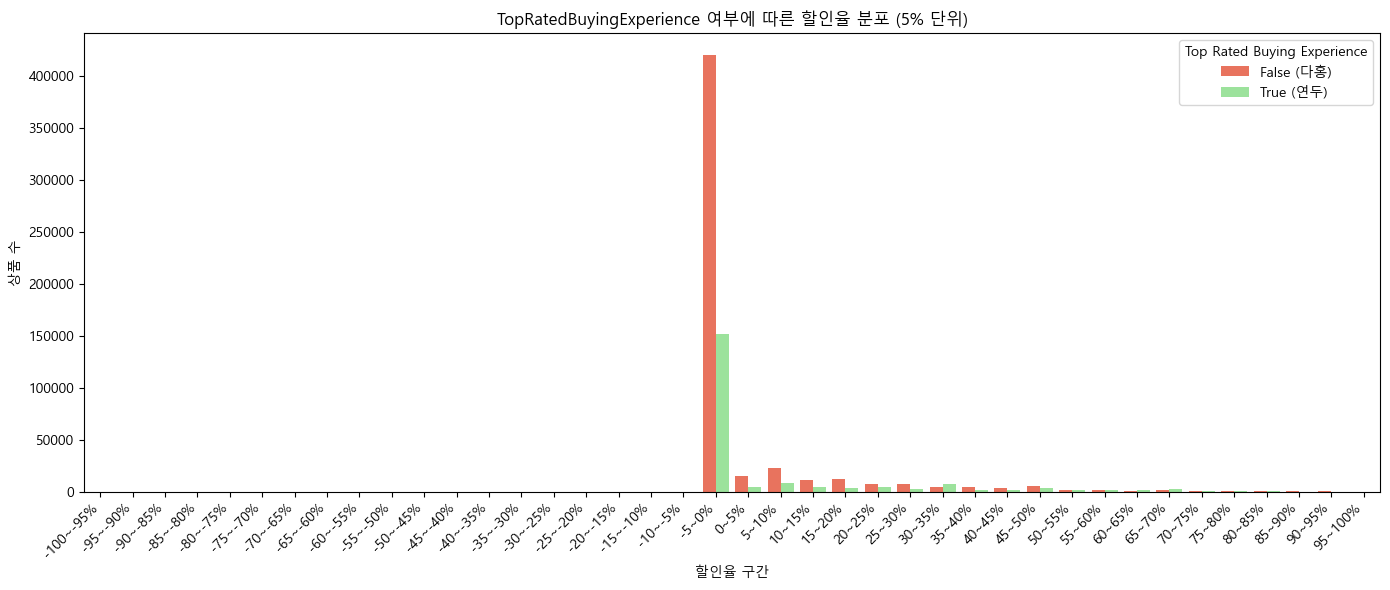

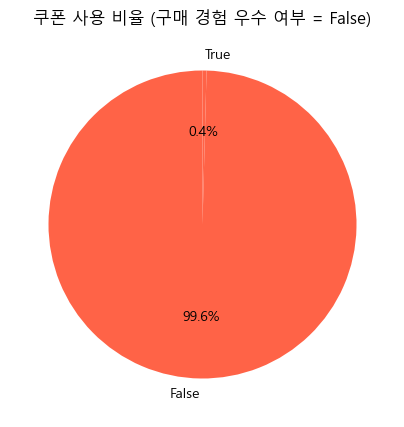

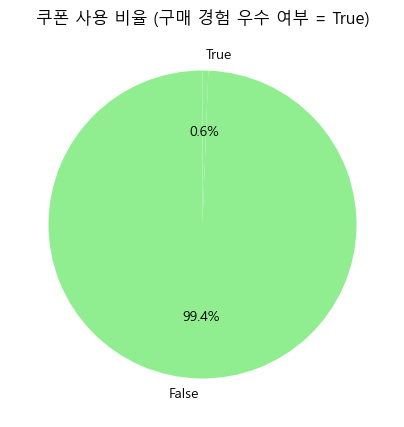

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 할인율을 5% 단위로 구간화 (퍼센트 값 기준)
bin_edges = list(range(-100, 105, 5))  # -100 ~ 100까지 5% 간격
bin_labels = [f"{i}~{i+5}%" for i in bin_edges[:-1]]
df['discount_bin'] = pd.cut(df['discountRatio'], bins=bin_edges, labels=bin_labels)

# ✅ 할인율 분포 시각화 (막대그래프, 색상 지정)
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x='discount_bin',
    hue='topRatedBuyingExperience',
    palette={False: '#ff6347', True: '#90ee90'}  # 다홍 / 연두
)
plt.title('TopRatedBuyingExperience 여부에 따른 할인율 분포 (5% 단위)')
plt.xlabel('할인율 구간')
plt.ylabel('상품 수')
plt.legend(title='Top Rated Buying Experience', labels=['False (다홍)', 'True (연두)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ✅ 쿠폰 사용 여부 파이차트 시각화
coupon_df = df.groupby(['topRatedBuyingExperience', 'availableCoupons']).size().reset_index(name='count')
coupon_df['ratio'] = coupon_df.groupby('topRatedBuyingExperience')['count'].transform(lambda x: x / x.sum())

# ✅ 각 그룹별로 파이차트 출력
for value in df['topRatedBuyingExperience'].unique():
    sub = coupon_df[coupon_df['topRatedBuyingExperience'] == value]
    labels = sub['availableCoupons'].astype(str)
    sizes = sub['ratio']
    color = '#90ee90' if value else '#ff6347'
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=[color]*len(sizes))
    plt.title(f'쿠폰 사용 비율 (구매 경험 우수 여부 = {value})')
    plt.show()


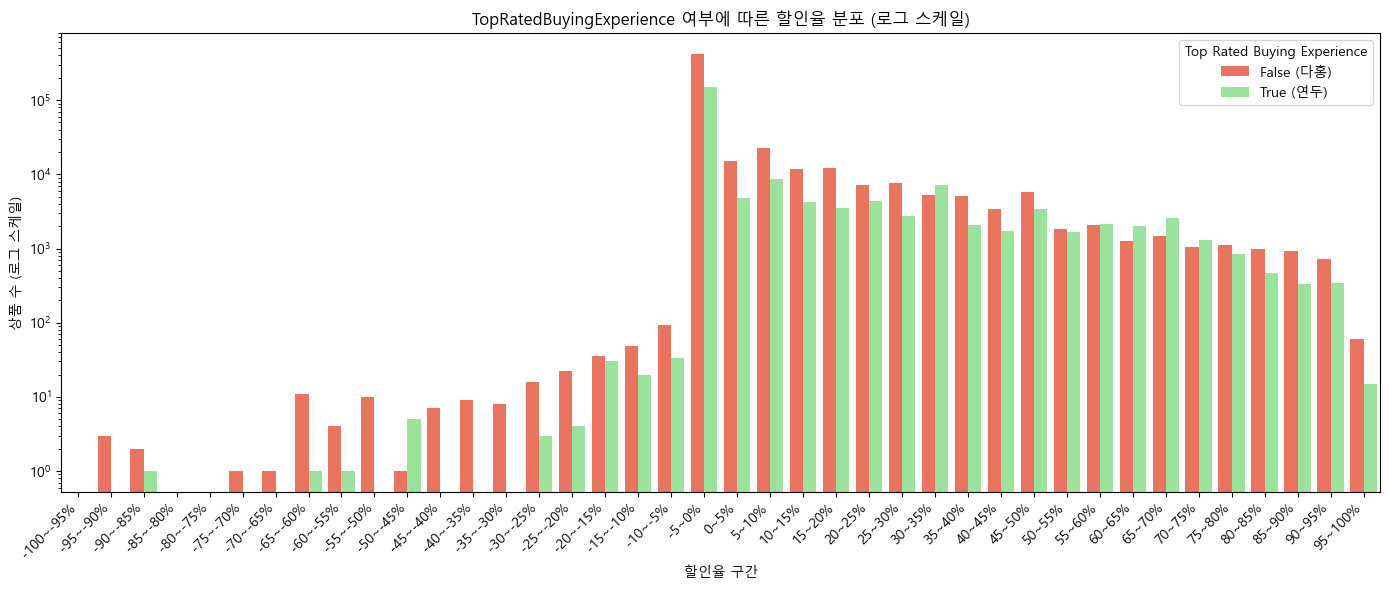

In [3]:
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x='discount_bin',
    hue='topRatedBuyingExperience',
    palette={False: '#ff6347', True: '#90ee90'}  # 다홍 / 연두
)
plt.yscale('log')  # 로그 스케일
plt.title('TopRatedBuyingExperience 여부에 따른 할인율 분포 (로그 스케일)')
plt.xlabel('할인율 구간')
plt.ylabel('상품 수 (로그 스케일)')
plt.legend(title='Top Rated Buying Experience', labels=['False (다홍)', 'True (연두)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
import matplotlib.pyplot as plt

# ✅ 색상 지정: True → 연두색, False → 다홍색
color_map = {False: '#ff6347', True: '#90ee90'}  # False: 다홍, True: 연두
colors = [color_map[col] for col in bin_ratio.columns]

# ✅ 누적 막대 그래프 그리기
bin_ratio.plot(kind='bar', stacked=True, figsize=(14, 6), color=colors)
plt.title('할인율 구간별 TopRatedBuyingExperience 비율 (누적 막대)')
plt.xlabel('할인율 구간')
plt.ylabel('비율 (%)')
plt.legend(title='TopRatedBuyingExperience', labels=['False (다홍)', 'True (연두)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


NameError: name 'bin_ratio' is not defined

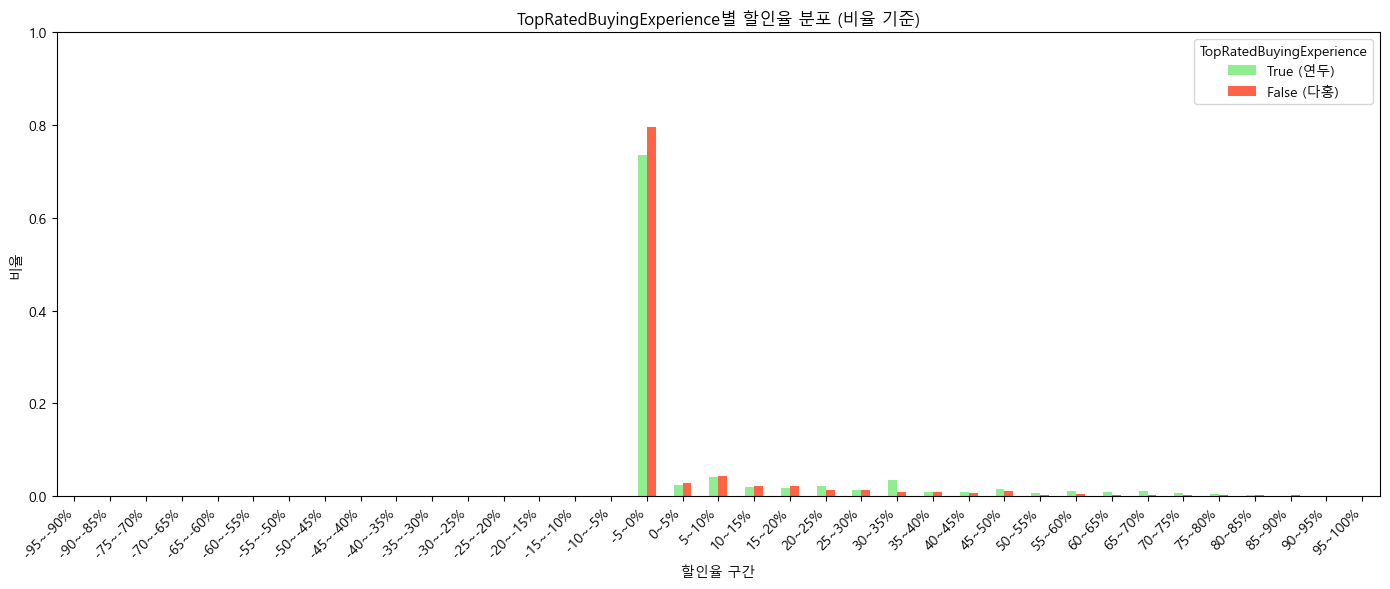

In [5]:
import matplotlib.pyplot as plt

# ✅ True/False 각각의 전체 수 대비 비율 계산
cross = pd.crosstab(df['discount_bin'], df['topRatedBuyingExperience'])

cross_pct = pd.DataFrame({
    'True': (cross[True] / cross[True].sum()).round(4),
    'False': (cross[False] / cross[False].sum()).round(4)
})

# ✅ 시각화
cross_pct.plot(kind='bar', figsize=(14, 6), color=['#90ee90', '#ff6347'])  # 연두/다홍
plt.title('TopRatedBuyingExperience별 할인율 분포 (비율 기준)')
plt.xlabel('할인율 구간')
plt.ylabel('비율')
plt.ylim(0, 1)
plt.legend(title='TopRatedBuyingExperience', labels=['True (연두)', 'False (다홍)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


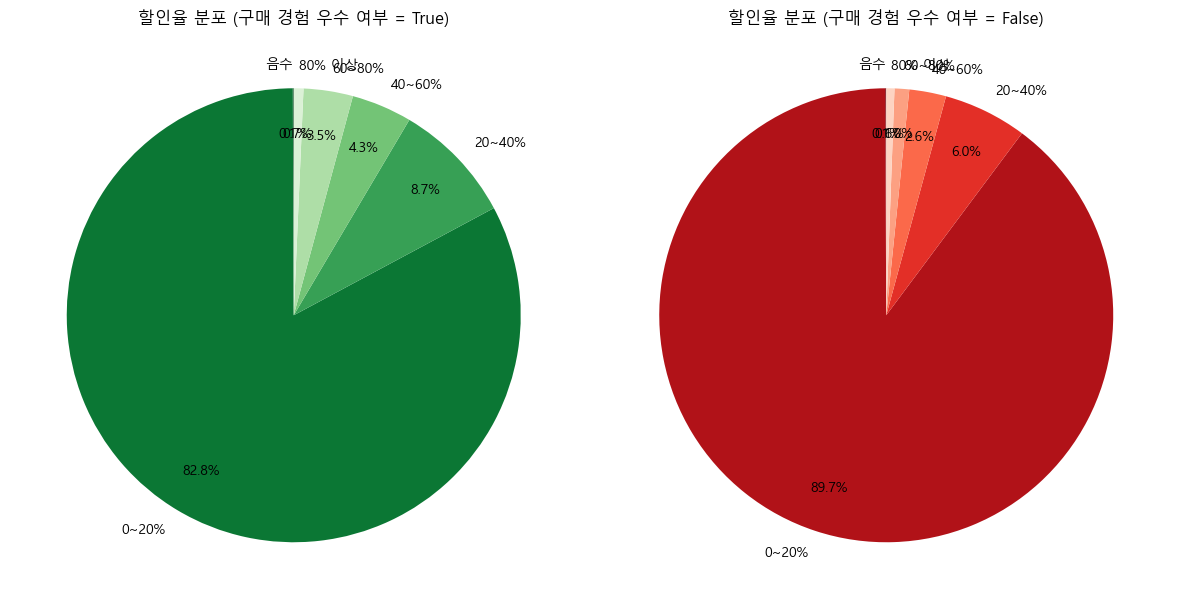

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 🔧 할인율 구간 정의 함수 (20% 단위 + 음수 묶음)
def map_discount_range(x):
    if x < 0:
        return '음수'
    elif x < 20:
        return '0~20%'
    elif x < 40:
        return '20~40%'
    elif x < 60:
        return '40~60%'
    elif x < 80:
        return '60~80%'
    else:
        return '80% 이상'

# ✅ 구간 적용
df['discount_group'] = df['discountRatio'].apply(map_discount_range)

# ✅ 그룹별 비율 계산
rate_df = df.groupby(['topRatedBuyingExperience', 'discount_group']).size().reset_index(name='count')
rate_df['ratio'] = rate_df.groupby('topRatedBuyingExperience')['count'].transform(lambda x: x / x.sum())

# ✅ 할인율 구간 고정 순서
discount_order = ['음수', '0~20%', '20~40%', '40~60%', '60~80%', '80% 이상']

# ✅ 파이차트: True 왼쪽(연두 그라데이션), False 오른쪽(다홍 그라데이션)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, value in enumerate([True, False]):
    sub = rate_df[rate_df['topRatedBuyingExperience'] == value]
    sub = sub.set_index('discount_group').reindex(discount_order).fillna(0).reset_index()
    labels = sub['discount_group']
    sizes = sub['ratio']

    # 컬러맵 적용 (연두 or 다홍 계열 그라데이션)
    cmap = cm.Greens if value else cm.Reds
    colors = [cmap(1 - i / len(sizes)) for i in range(len(sizes))]

    axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        labeldistance=1.1,  # 라벨을 원 밖으로
        pctdistance=0.8 
    )
    axes[i].set_title(f'할인율 분포 (구매 경험 우수 여부 = {value})')

plt.tight_layout()
plt.show()


In [7]:
# ✅ 할인율 구간 고정 순서 적용
discount_order = ['음수', '0~20%', '20~40%', '40~60%', '60~80%', '80% 이상']

# ✅ 교차표: 할인 구간 vs 구매 경험
pivot_table = pd.crosstab(df['discount_group'], df['topRatedBuyingExperience'])

# ✅ 비율 계산 (각 열 기준 → 그룹 내부에서 구간 비율)
pivot_table_pct = pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100
pivot_table_pct = pivot_table_pct.reindex(discount_order).round(2)

# ✅ 컬럼 이름 정리
pivot_table_pct.columns = ['False (%)', 'True (%)']

# ✅ 결과 출력
print(pivot_table_pct)


                False (%)  True (%)
discount_group                     
음수                   0.07      0.07
0~20%               89.73     82.76
20~40%               5.96      8.67
40~60%               2.62      4.30
60~80%               1.04      3.51
80% 이상               0.58      0.69


In [8]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm

# ✅ 1. T-test (두 그룹의 평균 할인율 비교)
true_group = df[df['topRatedBuyingExperience'] == True]['discountRatio']
false_group = df[df['topRatedBuyingExperience'] == False]['discountRatio']

t_stat, t_p = ttest_ind(true_group, false_group, equal_var=False)  # Welch’s t-test
print(f"[T-test] 통계량: {t_stat:.4f}, p-value: {t_p:.6f}")

# ✅ 2. 로지스틱 회귀 (할인율이 구매 경험에 영향을 미치는가)
X = df[['discountRatio']]
X = sm.add_constant(X)  # 상수항 추가
y = df['topRatedBuyingExperience'].astype(int)

logit_model = sm.Logit(y, X).fit()
print("\n[로지스틱 회귀 결과]")
print(logit_model.summary())

# ✅ 3. 카이제곱 검정 (할인율 구간 vs 구매 경험)
# 할인율 구간화 (20% 단위 + 음수)
def map_discount_range(x):
    if x < 0:
        return '음수'
    elif x < 20:
        return '0~20%'
    elif x < 40:
        return '20~40%'
    elif x < 60:
        return '40~60%'
    elif x < 80:
        return '60~80%'
    else:
        return '80% 이상'

df['discount_group'] = df['discountRatio'].apply(map_discount_range)

# 교차표 & 검정
contingency = pd.crosstab(df['discount_group'], df['topRatedBuyingExperience'])
chi2, chi_p, dof, expected = chi2_contingency(contingency)
print(f"\n[카이제곱 검정] 통계량: {chi2:.4f}, p-value: {chi_p:.6f}, 자유도: {dof}")


[T-test] 통계량: 77.6511, p-value: 0.000000
Optimization terminated successfully.
         Current function value: 0.588429
         Iterations 5

[로지스틱 회귀 결과]
                              Logit Regression Results                              
Dep. Variable:     topRatedBuyingExperience   No. Observations:               733886
Model:                                Logit   Df Residuals:                   733884
Method:                                 MLE   Df Model:                            1
Date:                      Wed, 09 Jul 2025   Pseudo R-squ.:                0.008169
Time:                              22:16:48   Log-Likelihood:            -4.3184e+05
converged:                             True   LL-Null:                   -4.3540e+05
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

c:\Temp\ipykernel_9988\4187821812.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


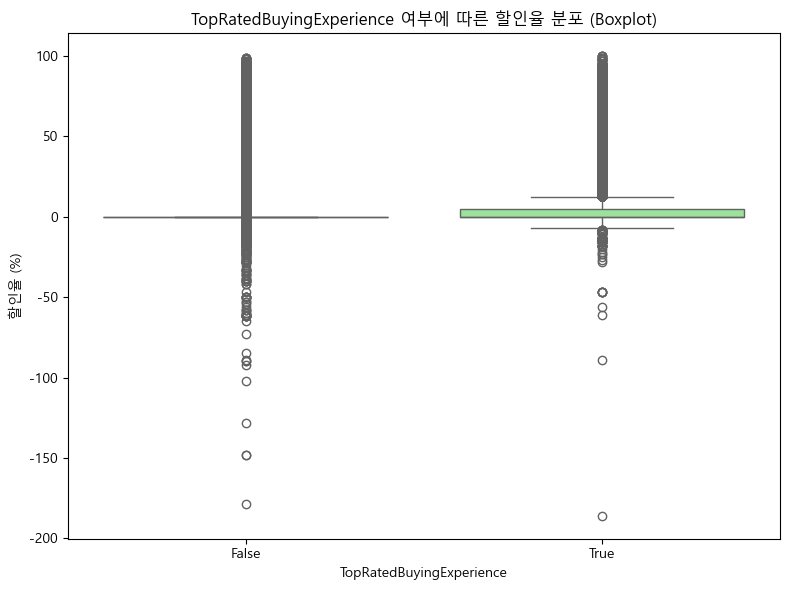

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 문자열일 경우 palette도 문자열 키로
palette = {'True': '#90ee90', 'False': '#ff6347'}  # 연두 / 다홍

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='topRatedBuyingExperience',
    y='discountRatio',
    palette=palette
)
plt.title('TopRatedBuyingExperience 여부에 따른 할인율 분포 (Boxplot)')
plt.xlabel('TopRatedBuyingExperience')
plt.ylabel('할인율 (%)')
plt.tight_layout()
plt.show()


Text(0, 0.5, '예측 확률')

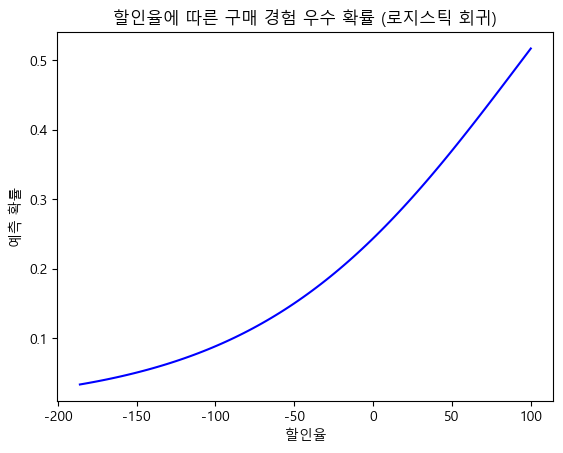

In [10]:
import numpy as np
from scipy.special import expit  # 시그모이드 함수

x_vals = np.linspace(df['discountRatio'].min(), df['discountRatio'].max(), 100)
y_vals = expit(-1.1332 + 0.012 * x_vals)

plt.plot(x_vals, y_vals, color='blue')
plt.title('할인율에 따른 구매 경험 우수 확률 (로지스틱 회귀)')
plt.xlabel('할인율')
plt.ylabel('예측 확률')


<Axes: xlabel='discount_group', ylabel='Count'>

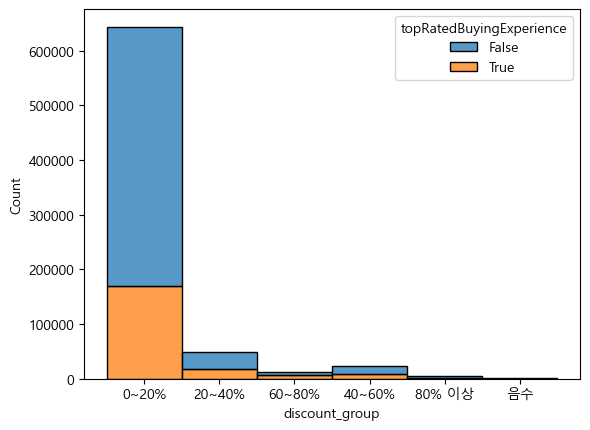

In [11]:
sns.histplot(data=df, x='discount_group', hue='topRatedBuyingExperience', multiple='stack')


In [13]:
df['topRatedBuyingExperience'].value_counts()

topRatedBuyingExperience
False    528147
True     205739
Name: count, dtype: int64